### Quiz 2 - Machine Learning Course

### Group 6

- [Wildan Hafidz Mauludin](https://github.com/nikoshaa)
- [Dhayu Intan Nareswari](https://github.com/DhayuIntan)
- [Farhan Dwi Pramana](https://github.com/FarhanDwiPramana)
- [Mochammad Zaky Zamroni](https://github.com/zakyzuf)
- [Ziedny Bisma Mubarok](https://github.com/Ziedny28)

### Kasus - OCR Manual pada KTP menggunakan CNN model

# Import Library

In [ ]:
import numpy as np
import imutils
import cv2
from tensorflow.keras.models import load_model
from imutils.contours import sort_contours
from google.colab.patches import cv2_imshow

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Load Model

In [ ]:
network = load_model('/content/drive/MyDrive/haarcascades/my_model.h5')
# check summary
network.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 3, 3, 128)         73856     
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 1, 1, 128)        

# Load Image

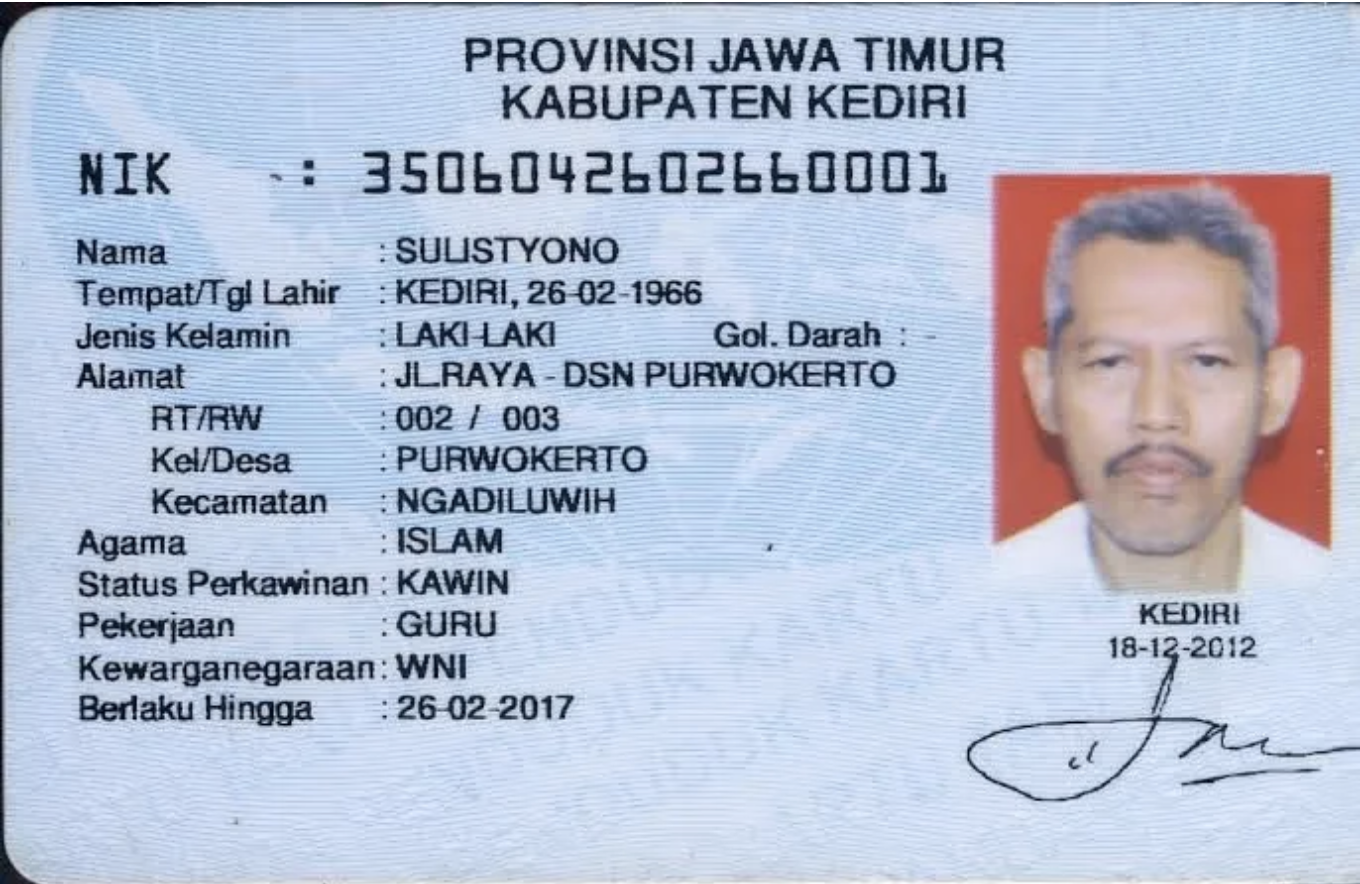

In [ ]:
img = cv2.imread('/content/drive/MyDrive/KTP/ktp_uji.png')
# show image
cv2_imshow(img)

## Convert to Gray

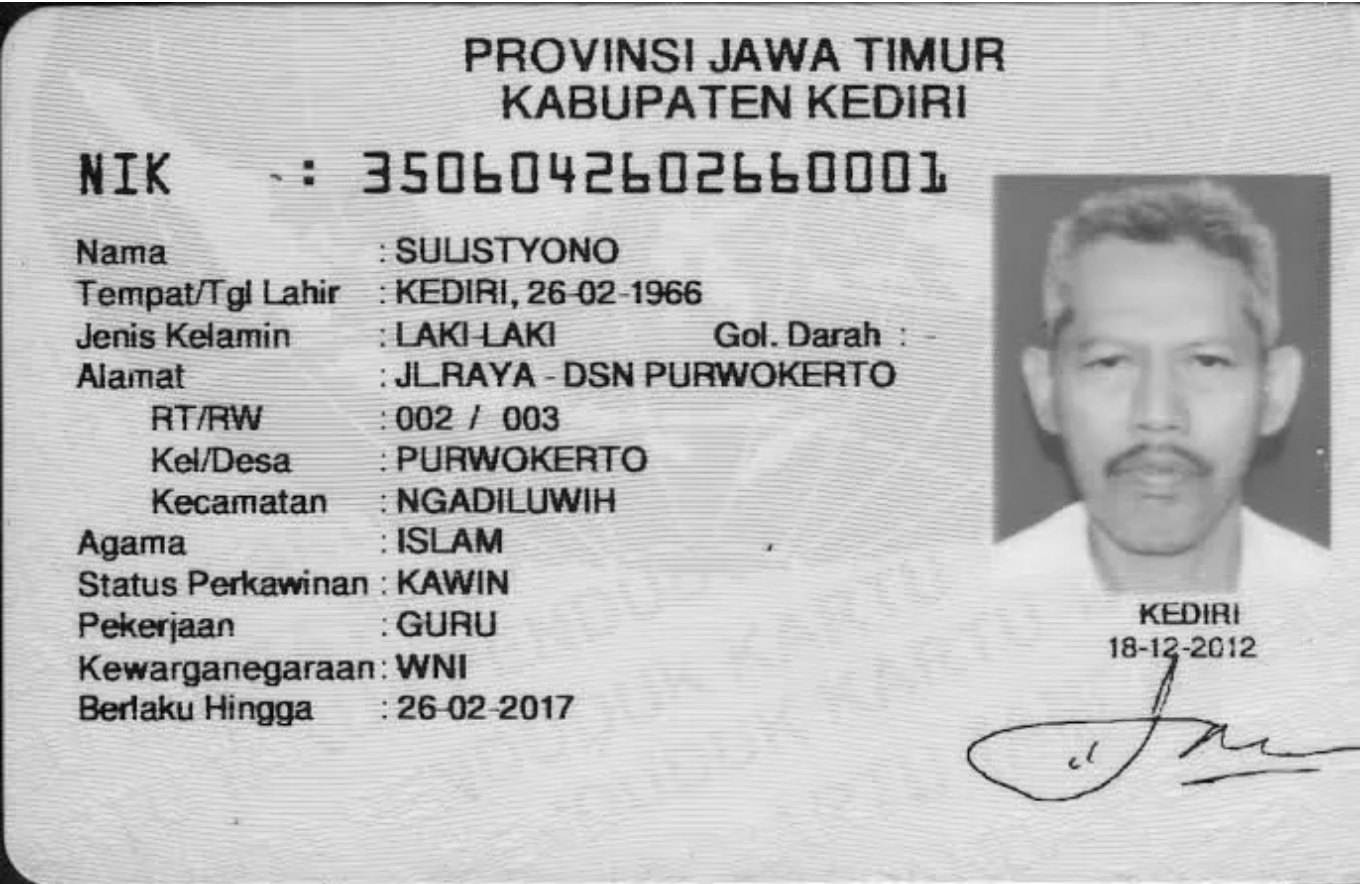

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# show
cv2_imshow(gray)

## Pre-processing

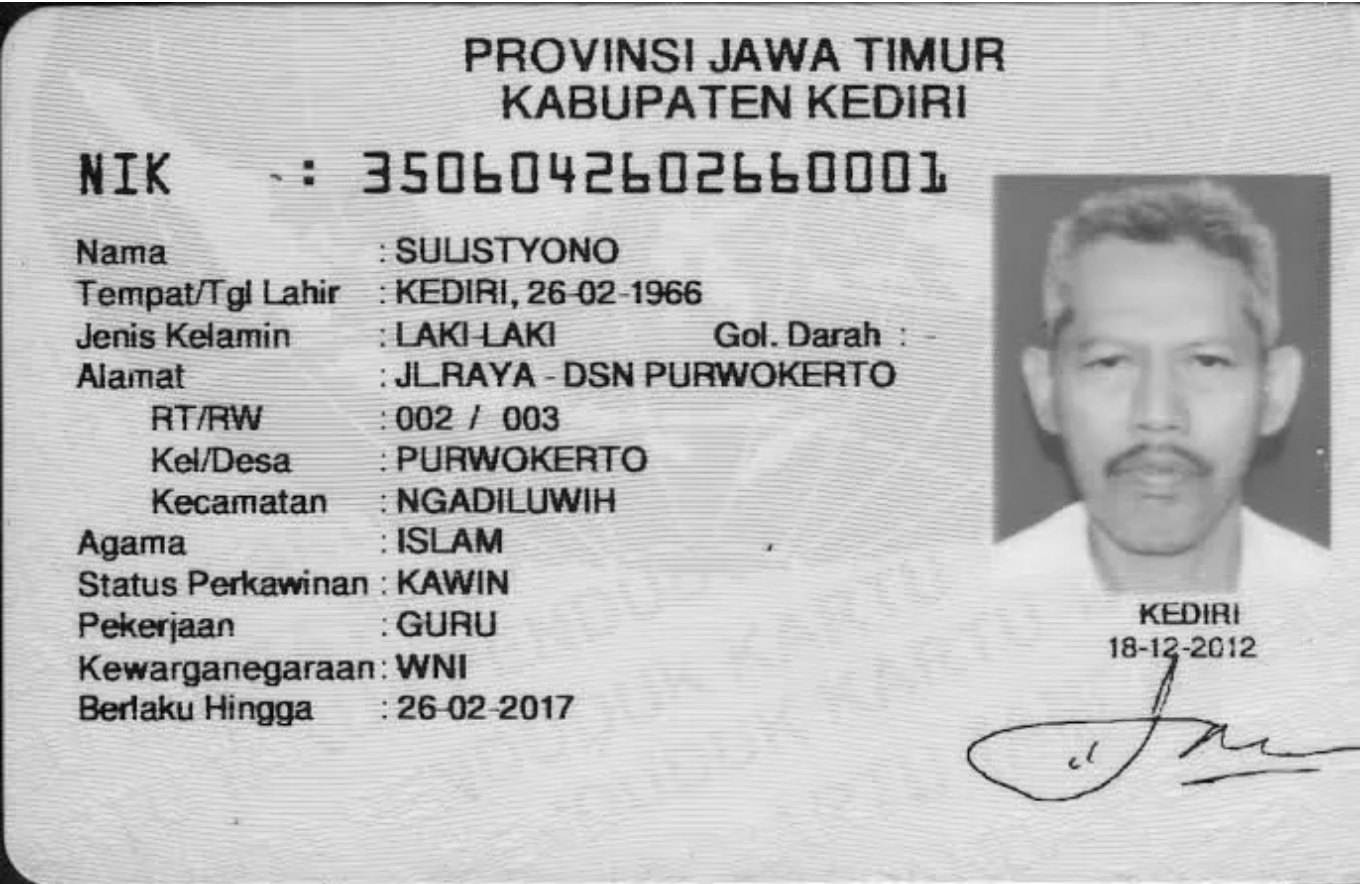

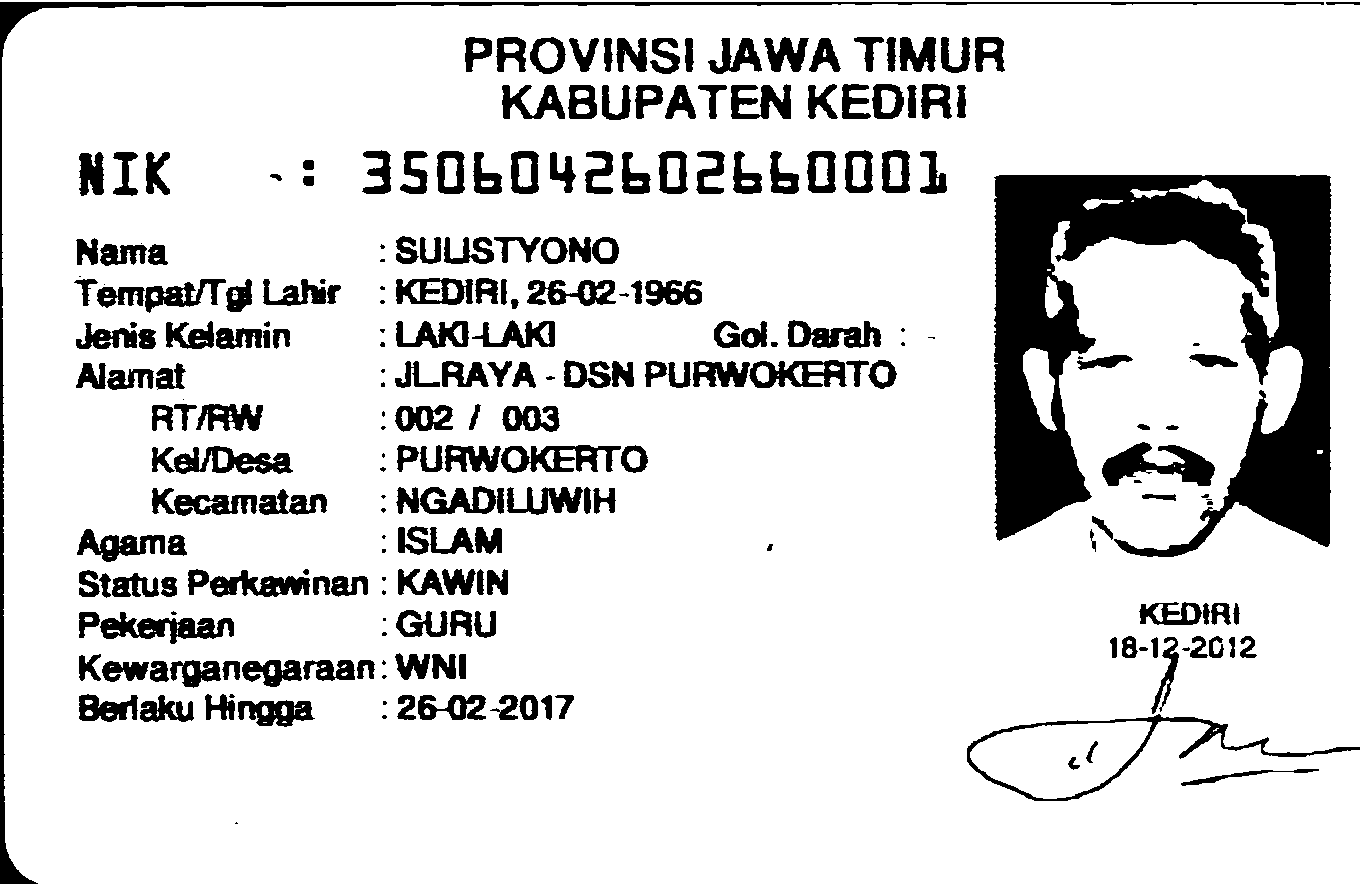

In [ ]:
# Test erode
erode = cv2.erode(gray, np.ones((1,1)))
cv2_imshow(erode)
# Test Otsu
_, otsu = cv2.threshold(erode, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
cv2_imshow(otsu)

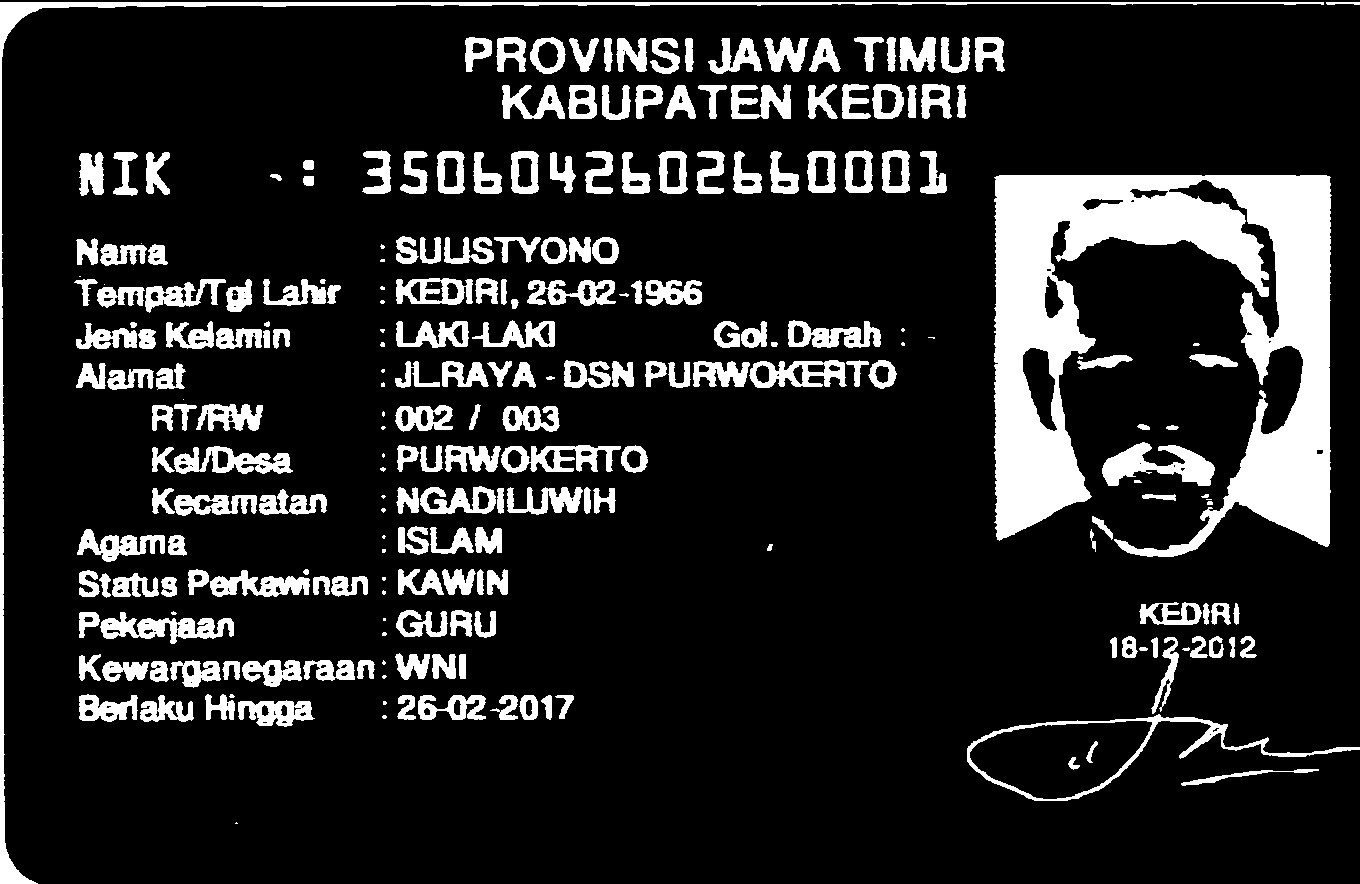

In [ ]:
# inverse image since we trained out model
# with black background
invertion = 255 - otsu
# check
cv2_imshow(invertion)

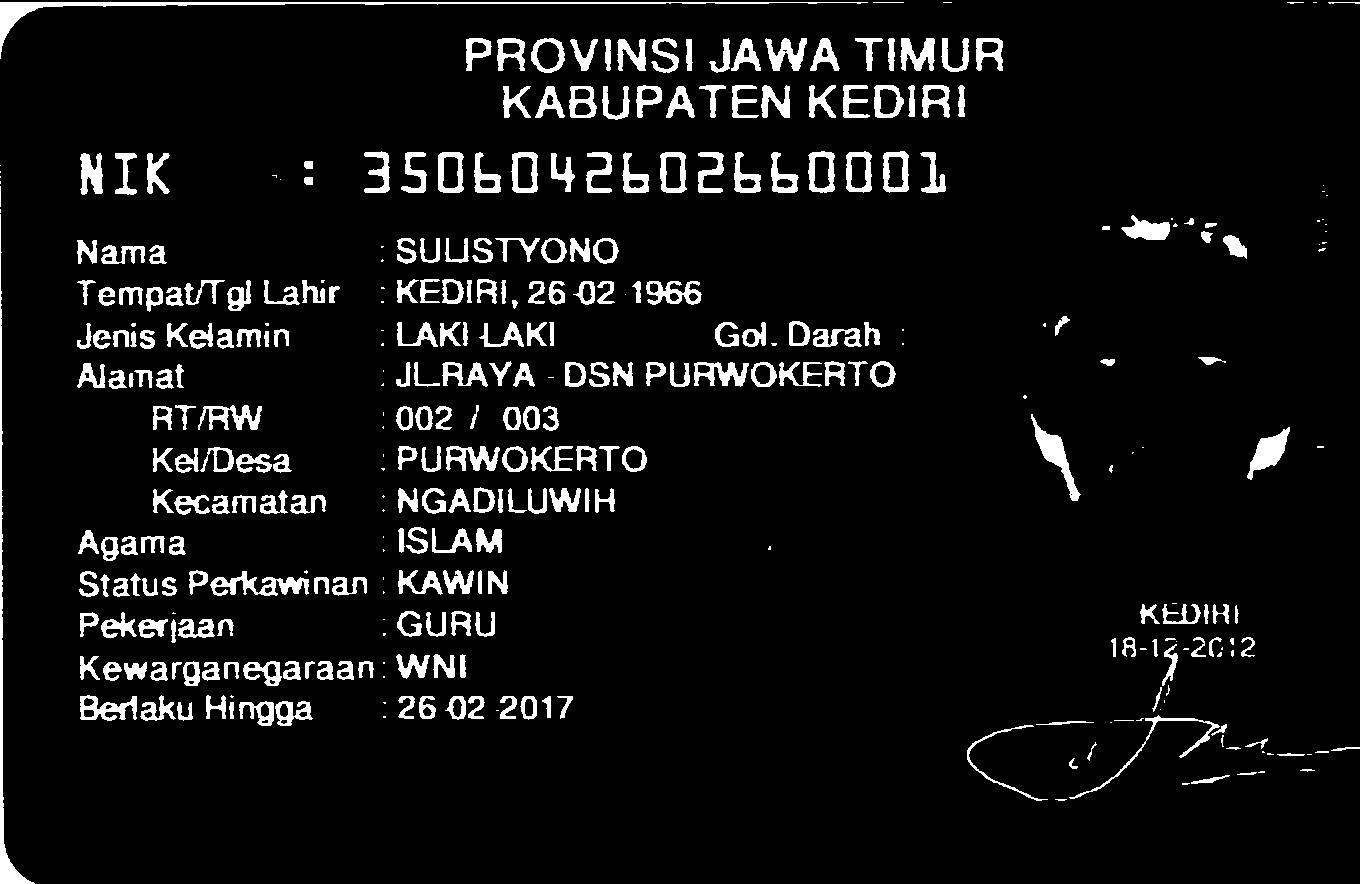

In [ ]:
# Compute histogram and probabilities of each intensity level
histogram = np.histogram(img, bins=256, range=(0, 256), density=True)[0]
total_pixels = img.shape[0] * img.shape[1]
probabilities = histogram / total_pixels

# Initialize variables
maximum_variance = 0
optimal_threshold = 0

# Iterate over all possible threshold values
for t in range(256):
    # Calculate weights and means
    w0 = np.sum(probabilities[:t])
    w1 = np.sum(probabilities[t:])
    mean0 = np.sum(np.arange(t) * probabilities[:t]) / w0 if w0 > 0 else 0
    mean1 = np.sum(np.arange(t, 256) * probabilities[t:]) / w1 if w1 > 0 else 0

    # Calculate between-class variance
    variance = w0 * w1 * (mean0 - mean1) ** 2

    # Update maximum variance and optimal threshold
    if variance > maximum_variance:
        maximum_variance = variance
        optimal_threshold = t

# Apply thresholding
thresholded_image = (img > 100) * 255
optimal_thresholded_image = (img > optimal_threshold) * 255

# Threshold the grayscale image to create a mask.
threshold = 100
mask = cv2.threshold(gray, threshold, 255, cv2.THRESH_BINARY_INV)[1]

cv2_imshow(mask)

## Contour Detection

In [ ]:
# Define function for contour detection
def find_contours(img):
  conts = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  conts = imutils.grab_contours(conts)
  conts = sort_contours(conts, method='left-to-right')[0]

  return conts

In [ ]:
conts = find_contours(mask.copy())

In [ ]:
# Check contour value
conts

(array([[[  0, 214]],
 
        [[  0, 883]],
 
        [[ 34, 883]],
 
        [[ 33, 882]],
 
        [[ 31, 882]],
 
        [[ 30, 881]],
 
        [[ 29, 881]],
 
        [[ 28, 880]],
 
        [[ 27, 880]],
 
        [[ 24, 877]],
 
        [[ 23, 877]],
 
        [[ 14, 868]],
 
        [[ 14, 867]],
 
        [[ 12, 865]],
 
        [[ 12, 864]],
 
        [[  9, 861]],
 
        [[  9, 859]],
 
        [[  7, 857]],
 
        [[  7, 855]],
 
        [[  6, 854]],
 
        [[  6, 853]],
 
        [[  5, 852]],
 
        [[  5, 848]],
 
        [[  4, 847]],
 
        [[  4, 844]],
 
        [[  3, 843]],
 
        [[  3, 808]],
 
        [[  2, 807]],
 
        [[  3, 806]],
 
        [[  3, 803]],
 
        [[  2, 802]],
 
        [[  2, 800]],
 
        [[  3, 799]],
 
        [[  3, 797]],
 
        [[  2, 796]],
 
        [[  2, 640]],
 
        [[  1, 639]],
 
        [[  1, 638]],
 
        [[  2, 637]],
 
        [[  2, 617]],
 
        [[  1, 616]],
 
        [[  1, 6

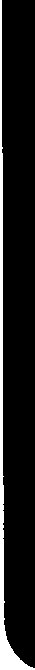

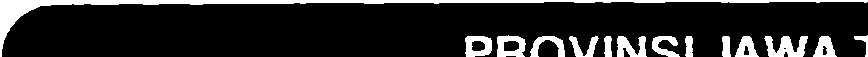

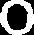

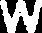

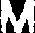

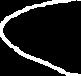

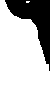

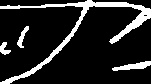

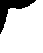

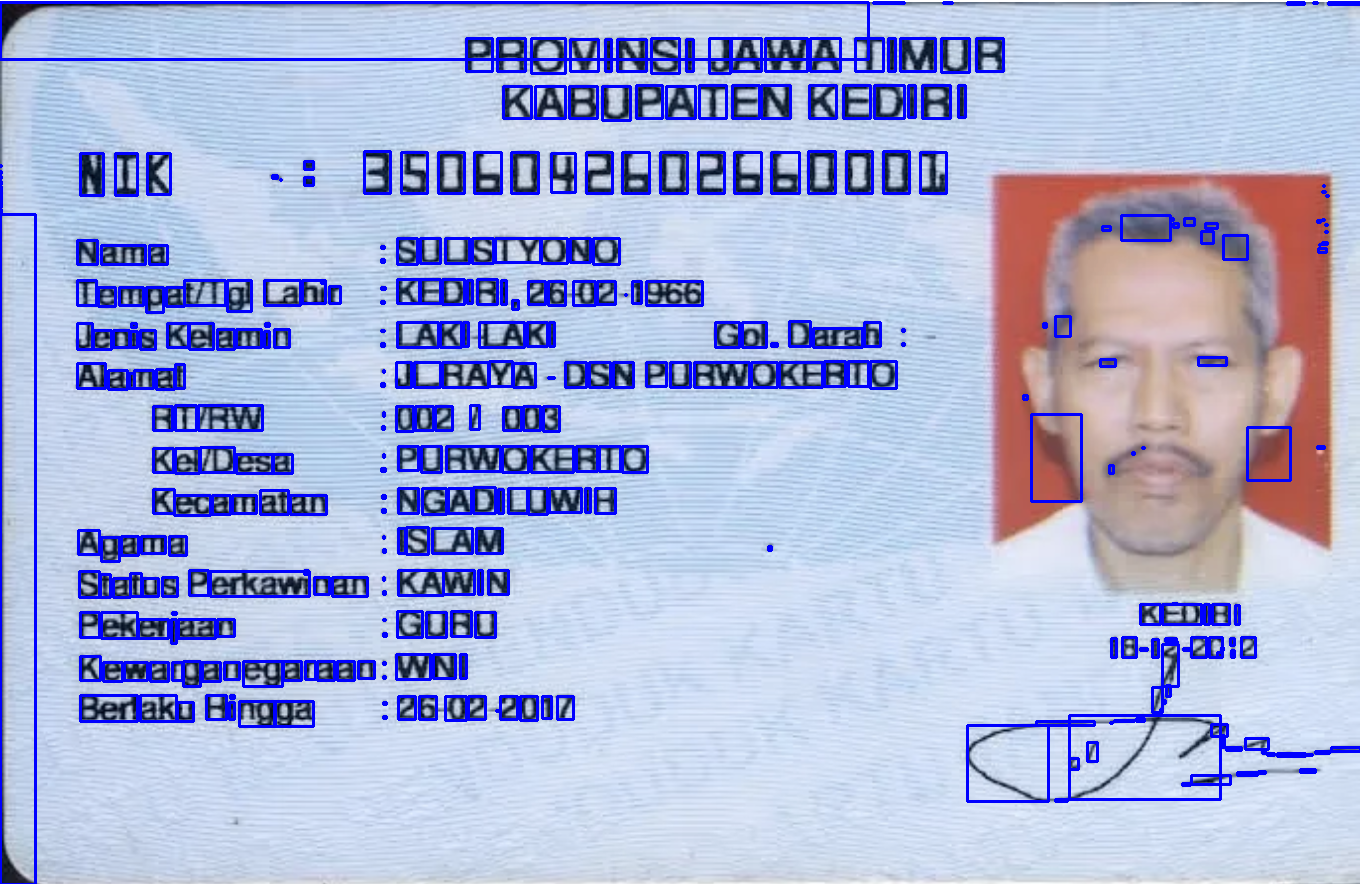

In [ ]:
# Get the char based on contour

# Setup min/max width/hight for char
min_w, max_w = 10, 160
min_h, max_h = 14, 140
img_copy = img.copy() # original image for plotting countour result

for c in conts:
  (x, y, w, h) = cv2.boundingRect(c) # find bounding box based on contour
  # if(w >= min_w and w <= max_w) and (h >= min_h and h <= max_h): # if pixel follow this rule, it consider as char
  roi = gray[y:y+h, x:x+w] # get region of interest for char
  thresh = cv2.threshold(roi, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
  cv2_imshow(thresh) # check

  # Build bounding box on original image
  cv2.rectangle(img_copy, (x,y), (x+w, y+h), (255,0,0), 2)

# Show bounding box on original image
cv2_imshow(img_copy)

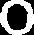

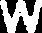

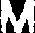

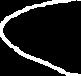

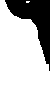

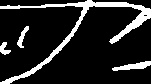

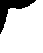

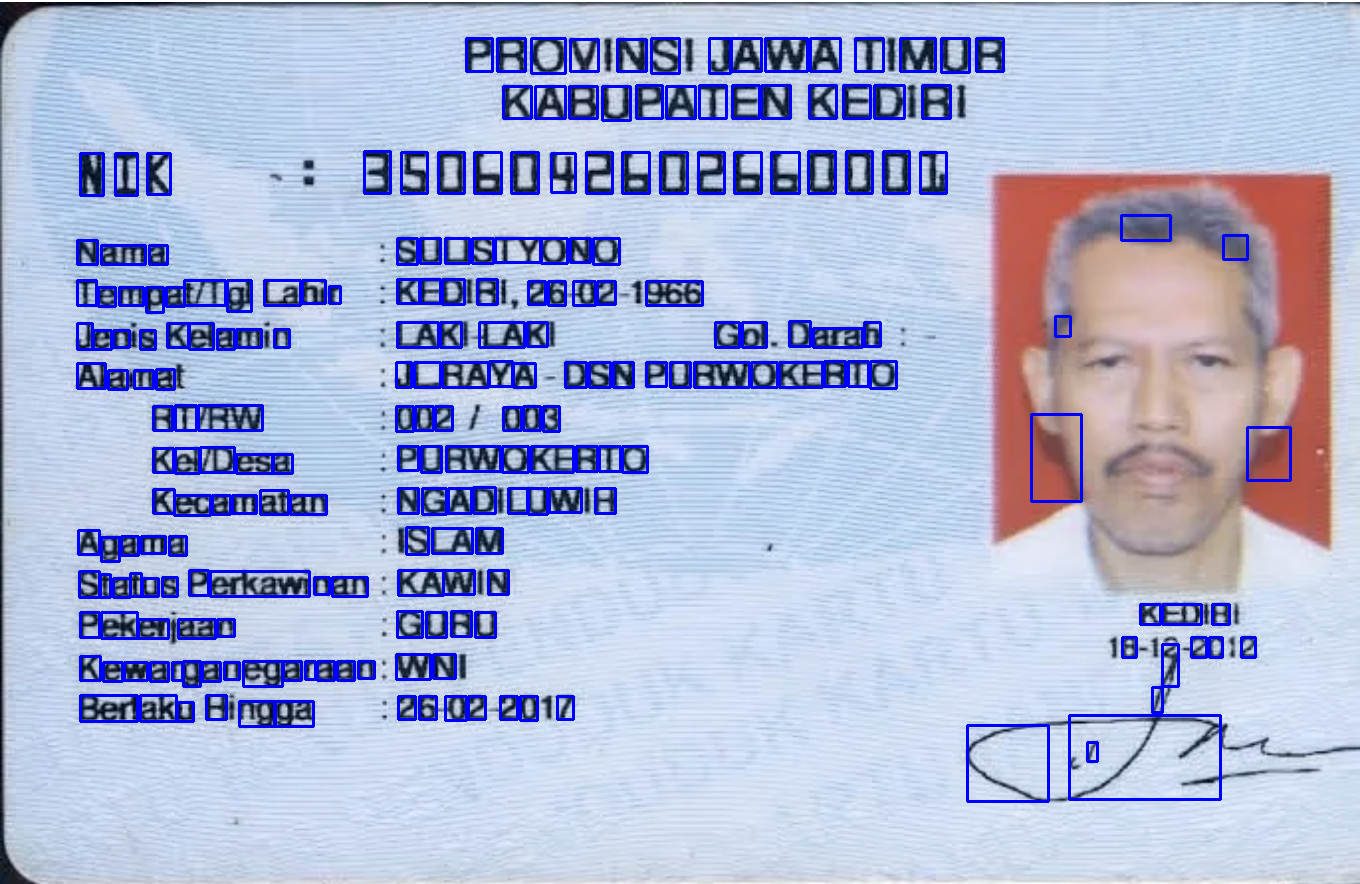

In [ ]:
# Get the char based on contour

# Setup min/max width/hight for char
min_w, max_w = 10, 160
min_h, max_h = 14, 140
img_copy = img.copy()

for c in conts:
  (x, y, w, h) = cv2.boundingRect(c) # find bounding box based on contour
  if(w >= min_w and w <= max_w) and (h >= min_h and h <= max_h): # if pixel follow this rule, it consider as char
    roi = gray[y:y+h, x:x+w] # get region of interest for char
    thresh = cv2.threshold(roi, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
    cv2_imshow(thresh) # check

    # Build bounding box on original image
    cv2.rectangle(img_copy, (x,y), (x+w, y+h), (255,0,0), 2)

# Show bounding box on original image
cv2_imshow(img_copy)

# Detect Char

## ROI extraction

In [ ]:
def extract_roi(img):
  roi = img[y:y+h, x:x+w]

  return roi

## Thresholding

In [ ]:
def thresholding(img):
  thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
  return thresh

## Resizing

- Inorder to make our char detection size match with input model
- Strategies:
   - Rather shrinking or enlarge the image, we try to fill the image with black pixel, and make our char stay in ration
   - We also makes our extracted char stay at the center of image

In [ ]:
def resize_img(img, w, h):
  if w > h:
    resized = imutils.resize(img, width=28)
  else:
    resized = imutils.resize(img, height=28)

  # (w, h) = resized.shape
  (h, w) = resized.shape

  # Calculate how many pixels need to fill char image
  dX = int(max(0, 28 - w) / 2.0)
  dY = int(max(0, 28 - h) / 2.0)

  filled = cv2.copyMakeBorder(resized, top=dY, bottom=dY, right=dX, left=dX, borderType=cv2.BORDER_CONSTANT, value=(0,0,0))
  filled = cv2.resize(filled, (28,28))

  return filled

In [ ]:
# Demo for enlarge
(x, y, w, h) = cv2.boundingRect(conts[1])
test_image = thresholding(gray[y:y+h, x:x+w])

# show original test image
cv2_imshow(test_image)

# Show enlarge test image
cv2_imshow(cv2.resize(test_image, (28,28)))

In [ ]:
# Demo by filled strategy
# (w, h) = test_image.shape
(h, w) = test_image.shape

test_image2 = resize_img(test_image, w, h)

cv2_imshow(test_image)
cv2_imshow(test_image2)

## Normalization

In [ ]:
def normalization(img):
  img = img.astype('float32') / 255.0 # convert to floating point
  img = np.expand_dims(img, axis=-1) # add depth
  return img

In [ ]:
# Check
test_image2.shape, normalization(test_image2).shape

((28, 28), (28, 28, 1))

# Detection

In [ ]:
def process_box(gray, x, y, w, h):

  roi = extract_roi(gray)
  thresh = thresholding(roi)
  (h, w) = thresh.shape
  resized = resize_img(thresh, w, h)

  # show result
  cv2_imshow(resized)

  normalized = normalization(resized)

  return (normalized, (x, y, w, h))

In [ ]:
# Detect every single char from contour
detected_char = []

for c in conts:
  (x, y, w, h ) = cv2.boundingRect(c)

  min_w, max_w = 10, 160
  min_h, max_h = 14, 140

  if(w >= min_w and w <= max_w) and (h >= min_h and h <= max_h):
    detected_char.append(process_box(gray, x, y, w, h))

In [ ]:
# check pixel for detected char sample
detected_char[0][0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.94509804],
        [0.94509804],
        [0.94509804],
        [0.94509804],
        [0.94509804],
        [0.94509804],
        [0.94509804],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [ ]:
# check bounding box for detected char sample
detected_char[0][1]

(77, 363, 28, 25)

In [ ]:
# Get all char pixel
pixels = np.array([px[0] for px in detected_char], dtype='float32')

# Get all box for detected char
boxes = [box[1] for box in detected_char]

In [ ]:
pixels.shape

(226, 28, 28, 1)

# Recognize Char

In [ ]:
digits = '0123456789'
letters = 'ABCDEFGHIJKLMNOPQRSTUVWZYZ'
char_list = digits + letters
char_list = [ch for ch in char_list]

print(char_list)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'Z', 'Y', 'Z']


In [ ]:
# Predict
preds = network.predict(pixels)

preds.shape

8/8 [==============================] - 0s 10ms/step


(226, 35)

In [ ]:
print(len(char_list))


36


In [ ]:
for p in preds:
    char_idx = np.argmax(p)
    print(char_idx, end=" ")

13 10 29 31 14 26 14 14 15 14 25 15 15 14 29 13 15 3 27 25 31 28 5 15 15 28 15 14 26 28 29 15 14 3 15 14 14 15 15 15 6 14 6 15 14 15 29 29 26 13 28 24 15 13 13 15 15 24 15 15 3 29 28 28 14 15 14 14 15 24 5 29 14 15 14 15 15 29 6 29 14 15 25 3 28 13 19 6 13 14 26 25 26 15 15 14 26 29 13 15 15 29 29 6 29 13 22 9 31 14 14 25 13 29 29 13 15 15 15 9 25 13 16 29 30 15 21 15 18 28 15 16 12 29 28 29 31 15 31 13 14 29 9 15 25 14 15 19 15 28 18 29 13 15 15 21 15 15 5 5 12 15 25 29 13 15 31 25 20 15 15 26 6 31 15 13 13 15 29 10 6 14 15 16 13 5 31 13 4 15 15 13 14 14 14 15 5 13 29 29 15 25 13 13 30 21 15 29 13 15 13 15 26 29 12 14 14 29 13 15 24 25 15 12 25 28 

In [ ]:
print(char_list)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'Z', 'Y', 'Z']


In [ ]:
# Char Prediction
for p in preds:
  char_idx = np.argmax(p)
  print(char_list[char_idx], end = " ")

D A T V E Q E E F E P F F E T D F 3 R P V S 5 F F S F E Q S T F E 3 F E E F F F 6 E 6 F E F T T Q D S O F D D F F O F F 3 T S S E F E E F O 5 T E F E F F T 6 T E F P 3 S D J 6 D E Q P Q F F E Q T D F F T T 6 T D M 9 V E E P D T T D F F F 9 P D G T U F L F I S F G C T S T V F V D E T 9 F P E F J F S I T D F F L F F 5 5 C F P T D F V P K F F Q 6 V F D D F T A 6 E F G D 5 V D 4 F F D E E E F 5 D T T F P D D U L F T D F D F Q T C E E T D F O P F C P S 

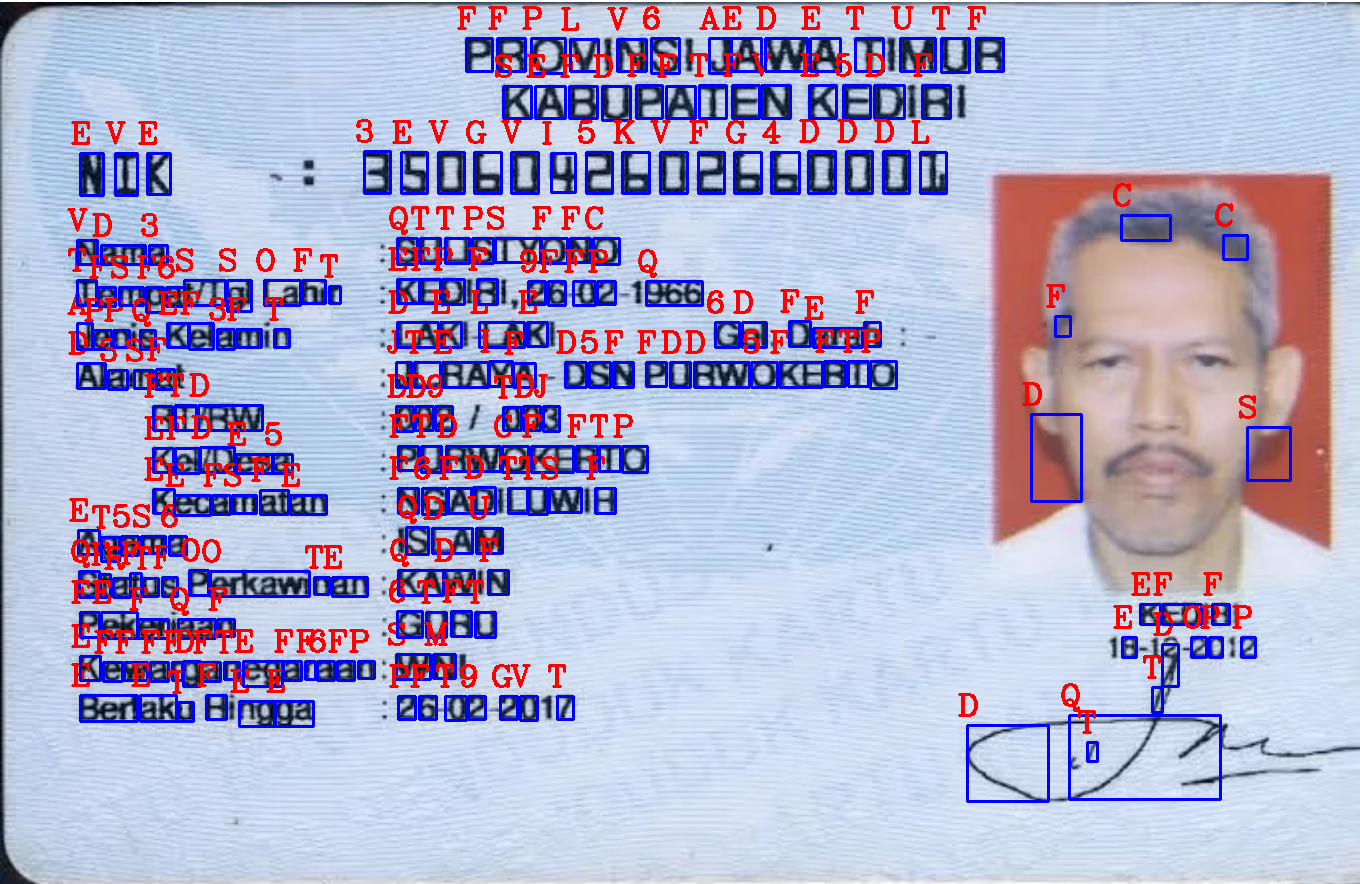

In [ ]:
# Show char with actual image
img_copy2 = img.copy()

for(pred, (x, y, w, h)) in zip(preds, boxes):
  i = np.argmax(pred)
  char_detected = char_list[i]

  cv2.rectangle(img_copy2, (x, y), (x+w, y+h), (255,0,0), 2)
  cv2.putText(img_copy2, char_detected, (x - 10, y - 10), cv2.FONT_HERSHEY_COMPLEX, 1, (0,0,255), 2)

cv2_imshow(img_copy2)